In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

def load_data():
    X = np.load("data/X.npy")
    y = np.load("data/y.npy")
    X = X[0:1000]
    y = y[0:1000]
    return X, y

X, y = load_data()
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


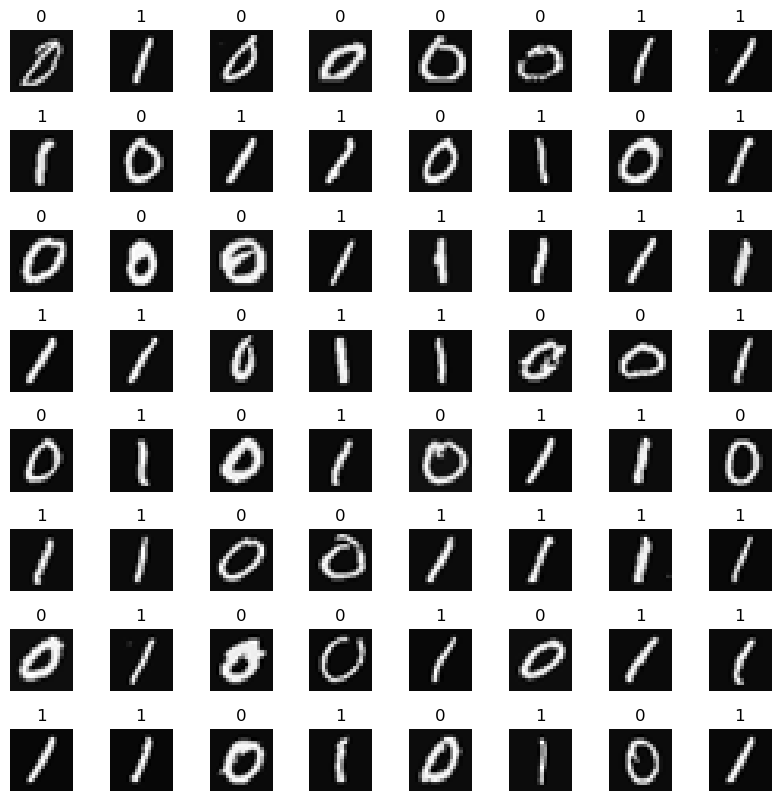

In [4]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

The model we use will have three dense layers with sigmoid activations. THe input are pixel values of digital images. Each image has size 20 x 20, therefore 400 inputs. The first layer has 25 units, the second layer 15, and the output layer 1 unit. __Before you proceed, draw a representation of the model!__

- If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer
    - `W` will be of dimensions $s_{in} \times s_{out}$
    - `b` will be a vector with $s_{out}$ elements
- For example, the shape of W and b for layer 1 are: W1 (400, 25) and b1 (25,) or (25,1)

In [5]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(400,)), # Specify input shape
    tf.keras.layers.Dense(25, activation='sigmoid'),
    tf.keras.layers.Dense(15, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name="my_model")

model.summary()

# Question: explain where the number of parameter comes from!

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2024-07-10 22:42:09.721333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-10 22:42:09.721817: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X, y,
    epochs=20
)

Epoch 1/20


2024-07-10 22:46:59.416095: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-07-10 22:46:59.840103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be

31/32 [============================>.] - ETA: 0s - loss: 0.6995

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x8x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x8x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/4e1473ee-9f66-11ee-8daf-cedaeb4cabe2/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShad

32/32 [==============================] - 3s 32ms/step - loss: 0.6994
Epoch 2/20
32/32 [==============================] - 0s 7ms/step - loss: 0.5683
Epoch 3/20
32/32 [==============================] - 0s 7ms/step - loss: 0.4596
Epoch 4/20
32/32 [==============================] - 0s 7ms/step - loss: 0.3551
Epoch 5/20
32/32 [==============================] - 0s 7ms/step - loss: 0.2701
Epoch 6/20
32/32 [==============================] - 0s 8ms/step - loss: 0.2085
Epoch 7/20
32/32 [==============================] - 0s 7ms/step - loss: 0.1648
Epoch 8/20
32/32 [==============================] - 0s 7ms/step - loss: 0.1337
Epoch 9/20
32/32 [==============================] - 0s 7ms/step - loss: 0.1110
Epoch 10/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0934
Epoch 11/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0801
Epoch 12/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0697
Epoch 13/20
32/32 [==============================] - 0s 7ms

The output of the model is interpreted as a probability. In the first example above, the input is a zero. The model predicts the probability that the input is a one is nearly zero. 
In the second example, the input is a one. The model predicts the probability that the input is a one is nearly one.

In [7]:
prediction = model.predict(X[0].reshape(1, 400)) # a zero
print(f"predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

2024-07-10 22:49:52.786266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 856ms/step
predicting a zero: [[0.02441609]]
1/1 [==============================] - 0s 24ms/step
 predicting a one:  [[0.9722673]]


In [8]:
if prediction >= 0.5:
    yhat = 1
else: 
    yhat = 0
print(f"prediction after thresholding: {yhat}")

prediction after thresholding: 1


Let's compare the predictions vs the labels for a random sample of 64 digits

1/1 [==============================] - 0s 12ms/step


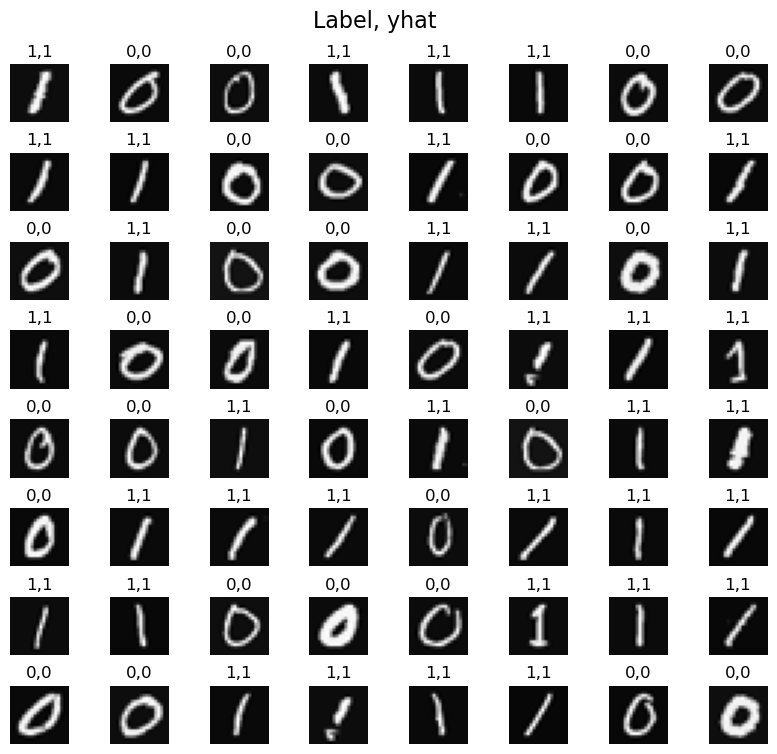

In [9]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [10]:
# Now we will implement the neural network using NumPy

def sigmoid(z):
    return 1/(1+np.exp(-z))

def my_dense(a_in, W, b, g): # This is for the entire layer with n neurons
    n = W.shape[1] # or n = a_in.shape[0]
    a_out = np.zeros(n)
    for i in range(n):
        z = np.dot(a_in, W[:, i]) + b[i]
        a_out[i] = g(z)
    return a_out

def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return a3

In [11]:
# Copy trained weights and biases from TensorFlow

[ layer1, layer2, layer3 ] = model.layers
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

# make predictions
prediction = my_sequential(X[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[0,0])
prediction = my_sequential(X[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y[500,0])

yhat =  0  label=  0
yhat =  1  label=  1


In [12]:
# Below are vectorized implementations

def my_dense_v(A_in, W, B, g):
    Z = np.matmul(A_in, W) + B
    A_out = g(Z)
    return A_out

def my_sequential_v(X, W1, B1, W2, B2, W3, B3):
    A1 = my_dense_v(X, W1, B1, sigmoid)
    A2 = my_dense_v(A1, W2, B2, sigmoid)
    A3 = my_dense_v(A2, W3, B3, sigmoid)
    return A3

Prediction = my_sequential_v(X, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
Prediction.shape

(1000, 1)

In [14]:
Yhat = (Prediction >= 0.5).astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


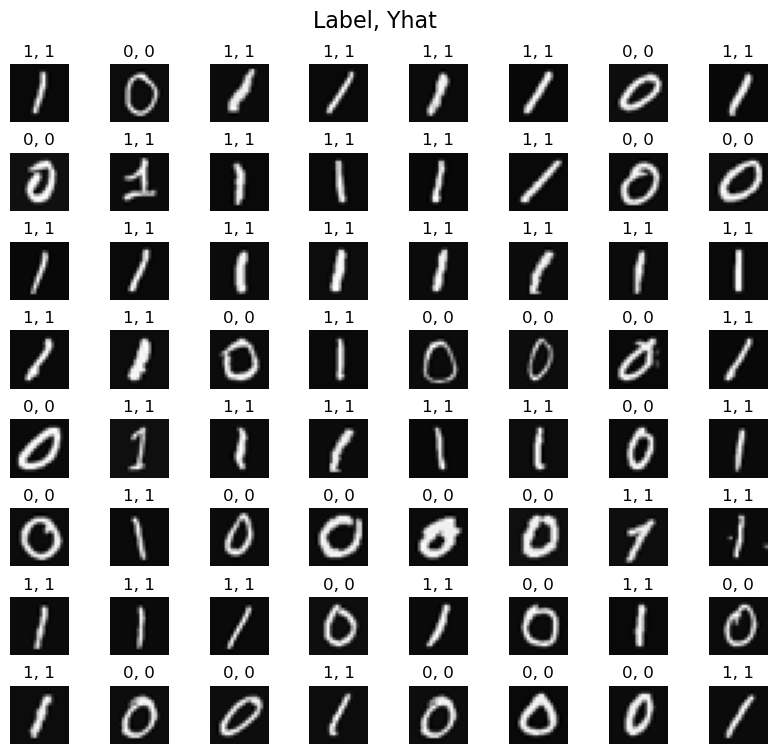

In [15]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()